# SVM

In this lab we will use support vector machines to classify handwriting samples

In [1]:
%matplotlib inline
import sklearn.linear_model
import numpy
import matplotlib.pyplot
import sklearn.svm
import sklearn.datasets
import sklearn.cross_validation

In [4]:
sklearn.datasets.load_digits()

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [2]:
# Load the images sample data set
digits = sklearn.datasets.load_digits()

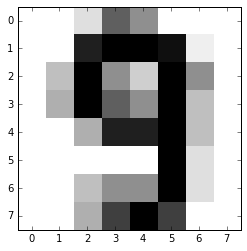

In [3]:
# You can display some sample images from the data set like this:
matplotlib.pyplot.imshow(digits.images[-2], cmap=matplotlib.pyplot.cm.gray_r, interpolation='nearest')

In [5]:
# The data is just an array of grayscale depths from a low-quality scanner
digits.data[-2]

array([  0.,   0.,   2.,  10.,   7.,   0.,   0.,   0.,   0.,   0.,  14.,
        16.,  16.,  15.,   1.,   0.,   0.,   4.,  16.,   7.,   3.,  16.,
         7.,   0.,   0.,   5.,  16.,  10.,   7.,  16.,   4.,   0.,   0.,
         0.,   5.,  14.,  14.,  16.,   4.,   0.,   0.,   0.,   0.,   0.,
         0.,  16.,   2.,   0.,   0.,   0.,   4.,   7.,   7.,  16.,   2.,
         0.,   0.,   0.,   5.,  12.,  16.,  12.,   0.,   0.])

In [6]:
# You can see what this number is supposed to be by looking at the target array.
digits.target[-2]

9

In [7]:
# Create an SVC classifier using all the default parameters
svc = sklearn.svm.SVC()

In [8]:
# Fit it to digits.data with a target of digits.target
svc.fit(digits.data, digits.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# Predict a few values, and see how it goes

In [15]:
# If you use sklearn.cross_validation.cross_val_score, how well does it perform?
# You will want to use the parameter scoring='accuracy'
sklearn.cross_validation.cross_val_score(svc, digits.data, digits.target, cv=10, scoring = 'accuracy')

array([ 0.44864865,  0.58469945,  0.38121547,  0.43333333,  0.47486034,
        0.4301676 ,  0.51955307,  0.58988764,  0.56497175,  0.44318182])

In [16]:
sklearn.cross_validation.cross_val_score(svc, digits.data, digits.target, cv=10, scoring = 'accuracy').mean()

0.48705191207774323

In [12]:
# Try using GridSearchCV with a variety of different values for C:
#  - kernels (rbf, poly, linear)
#  - degrees (only relevant for poly, but 1,2,3)
#  - gammas (try a range from 0.001 up to 1)
#  - C (try a few values above and below 1)

params = {
    'kernel': ['rbf', 'poly'],
    'degree': [2,3,4],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'C': [0.5, 1.0, 1.5]
}

searcher = sklearn.grid_search.GridSearchCV(sklearn.svm.SVC(), param_grid=params)
searcher.fit(digits.data, digits.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'poly'], 'C': [0.5, 1.0, 1.5], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0], 'degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [13]:
searcher.best_estimator_

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
searcher.best_score_

0.97551474680022254